# Решение простейших дифференциальных уравнений

Подключение библиотек `numpy` и `matplotlib`

Подключение функции `odeint` из модуля `scipy.integrate`, решающей системы из обыкновенных дифференциальных уравнений (ОДУ)

In [1]:
from scipy.integrate import odeint

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('retina')

Функция $\textrm{odeint}$ решает дифференциальное уравнение следующего вида:

\begin{cases}
\frac{dy}{dt} = f(y, t, ...)\\
y(t = t_0) = y_0
\end{cases}

Соответственно, для функции $\textrm{odeint}$ нужно задать три обязательных аргумента: производную функции $y$ по аргументу  t (функцию $f$), начальное условие $y_0$ для функции $y$ ($t=t_0$) и определить точки $t$, для которых будет найдено решение (причем первый элемент массива $t$ равен $t_0$).

Решим простое дифференциальное уравнение первого порядка:

### $\frac{dy}{dt} = t^2$


Функцию нужно написать в формате, подходящем для $\textrm{odeint}$, поэтому здесь указаны две переменных: $y$ и $t$


In [3]:
func = lambda y, t: t**2

Задание начальных параметров. $dt$ – временной шаг; $t$ – время в интервале от $0$ до $1$ с шагом $dt$; $N$ – количество шагов

In [4]:
dt = 1e-3
t = np.arange(0, 1, dt)

In [5]:
res = odeint(func, y0 = 0, t = t)

Решение уравнения $\frac{dy}{dt}=t^2$ есть $y(t)=t^3/3+C$, где $C$ – некоторая константа, которая в данном случае равна нулю из-за начального условия.

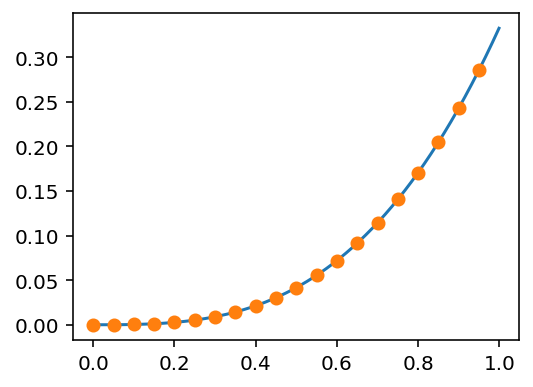

In [7]:
plt.figure(figsize = (4, 3))
plt.plot(t,res)
plt.plot(t[::50], t[::50]**3/3 , 'o')

Рассмотрим теперь дифференциальное уравнение второго порядка:

### $\frac{d^2f}{dt^2} - 2\frac{df}{dt} + f = 0$

При помощи замены переменных $u=\frac{df}{dt}$ это уравнение можно свести к системе из двух ОДУ:
\begin{equation}
  \begin{cases}
    \frac{df}{dt}=u\\
    \frac{du}{dt}=2\frac{df}{dt}-f=2u-f
  \end{cases}
\end{equation}


Так как теперь у нас система из двух уравнений, на вход $\textrm{odeint}$ должен подаваться вектор из двух компонент: $\frac{dy}{dt}=\left[\frac{du}{dt},\frac{df}{dt}\right]$, где $y=[u,f]$. Следующая функция возвращает $\frac{dy}{dt}$: 

In [9]:
def func(y, t):
    u, f = y
    dydt = [2 * u - f, u]
    return dydt

Для системы из двух уравнений нужны два начальных условия: на функцию и ее производную. Выберем их в виде $f(0)=1$ и $f'(0)=1$. 

In [10]:
res = odeint(func, y0=[1, 1], t=t)

In [11]:
res.shape

(1000, 2)

Решением системы при таких начальных условиях будет функция $f(t)=e^t$. На рисунке сплошной кривой построен график решения, полученный функцией  $\textrm{odeint}$ , а кружками (с интервалом в 50 шагов) – функция  $f(t)=e^t$.

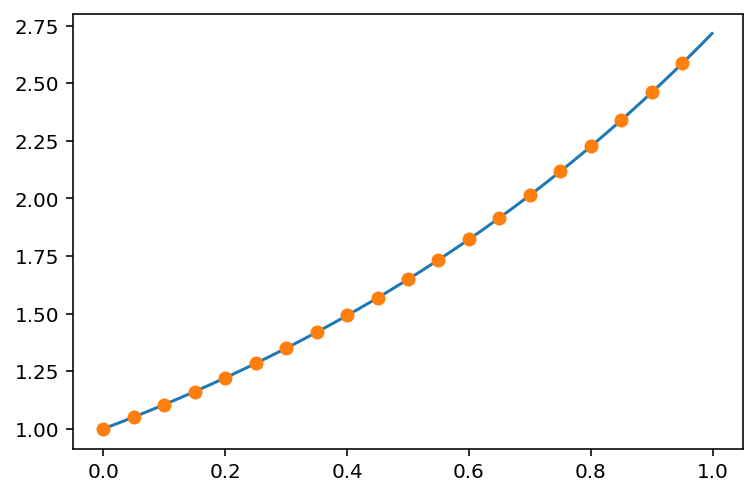

In [12]:
plt.plot(t, res[:, 1])
plt.plot(t[::50],  np.exp(t[::50]), 'o')

# Электрон в магнитном поле

Движение электрона в электромагнитном поле в общем случае описывается уравнением (в вакууме)
\begin{equation}
m\frac{d\textbf{v}}{dt}=e(-\textbf{E}+[\textbf{v}\times\textbf{H}]),
\end{equation}
где $m$ – масса электрона, $e$ – его заряд, $\textbf{v}$ – скорость электрона, $\textbf{E}, \textbf{H}$ – напряженности электрического и магнитного полей, соответственно.

В случае, если электрическое поле отсутствует ($\textbf{E}=0$), а магнитное поле направлено вдоль оси $z$ ($\textbf{H}=[0,0,H_z]$) уравнение упрощается:
\begin{equation}
m\frac{d\textbf{v}}{dt}=e([\textbf{v}\times\textbf{H}])= e \begin{vmatrix}
\textbf{i} & \textbf{j} & \textbf{k}\\
v_x & v_y & v_z\\
0 & 0 & H_z
\end{vmatrix} ,
\end{equation}
или

\begin{equation}
  \begin{cases}
    m \ddot x = e v_y H_z\\
    m \ddot y = -e v_x H_z\\
    m \ddot z = 0.
  \end{cases}
\end{equation}

Далее мы перейдем в систему, в которой $e/m=1$.

Пусть напряженность магнитного поля убывает с течением времени по гауссову закону:
\begin{equation}
H(t) = H_0 e^{-t^2/\alpha^2},
\end{equation}
где $H_0$ – размерная константа, которую мы тоже положим равной $1$, а $\alpha$ – константа, характеризующая скорость затухания, которая в нашем расчете будет равна $20$.

In [13]:
def H(t):
    return np.exp(-t**2 /20**2 )

Рассчитаем траекторию электрона в таком поле, которую он опишет за 30 **секунд**, с шагом в 0.001 с:

In [14]:
dt = 1e-3
t = np.arange(0, 30, dt)

Здесь у нас система из трех дифференциальных уравнений второго порядка,
\begin{equation}
  \begin{cases}
    \ddot x = v_y H_z\\
    \ddot y = - v_x H_z\\
    \ddot z = 0,
  \end{cases}
\end{equation}

которая путем замены переменных сводится к шести уравнениям первого порядка:

\begin{equation}
  \begin{cases}
     \dot x = v_x\\
     \dot v_x = v_y H_z\\
     \dot y = v_y\\
     \dot v_y = - v_x H_z\\
     \dot z = v_z\\
     \dot v_z = 0.
  \end{cases}
\end{equation}

Соответственно, на вход $\textrm{odeint}$ нужно подать вектор из шести компонент $[x, v_x, y, v_y, z, v_z]$, производную которого вычисляет функция $\textrm{MF}$:

In [15]:
def MF(r, t):
    x, vx, y, vy, z, vz = r
    return [vx, vy * H(t), vy, -vx * H(t), vz, 0]

В аргументах $\textrm{odeint}$ нужно задать шесть начальных условий, на каждую компоненту координаты и скорости $[x_0,v_{x0},y_0,v_{y0},z_0,v_{z0}]$:

In [16]:
res = odeint(MF, y0 = [0, 1, 0, 1, 0, 1], t = t)

Функция $\textrm{odeint}$ решает систему и выдает ответ в виде матрицы, в каждом столбце которой находится одна из компонент координаты или скорости в каждый момент времени. Для построения графиков эту матрицу нужно транспонировать:

In [17]:
x, vx, y, vy, z , vz = res.T

Построим траекторию электрона в плоскости $x \times y$. Чем выше напряженность поля, тем сильнее закручивается траектория электрона. Так как у нас поле со временем ослабевает, то траектория электрона постепенно распрямляется:

Text(0, 0.5, 'y')

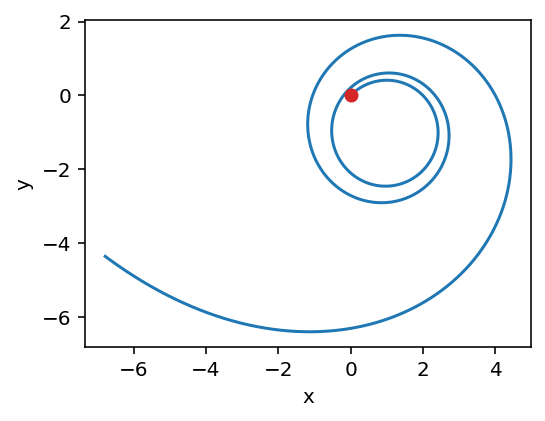

In [20]:
plt.figure(figsize = (4, 3))

plt.scatter( 0, 0, color = 'tab:red')
plt.plot(x, y, zorder = 0)
plt.xlabel('x')
plt.ylabel('y')

Вдоль оси $z$ движение электрона равномерное, так как $\ddot z = 0$. Для построения трехмерной траектории необходимо подключить функцию Axes3D из модуля mpl_toolkits.mplot3d:

In [21]:
from mpl_toolkits.mplot3d import Axes3D

Text(0.5, 0, 'z')

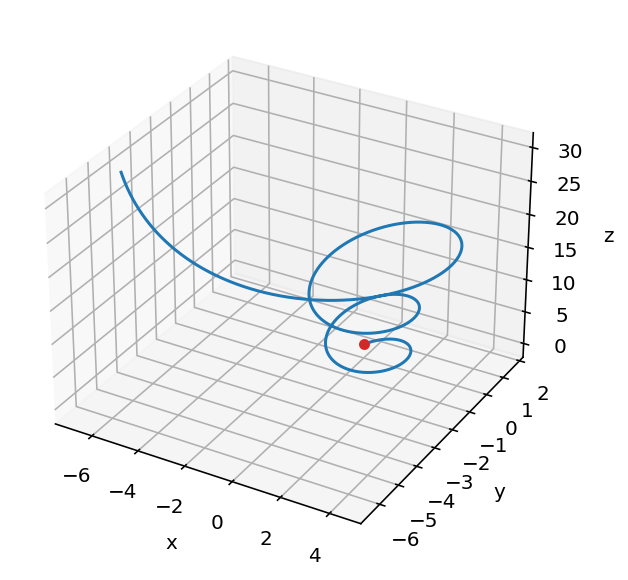

In [22]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter( 0, 0, 0, color = 'tab:red')
ax.plot(x, y, z,  zorder = 0)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

# Задача трех тел

Рассмотрим теперь задачу о движении массивных точечных тел в поле собственных гравитационных сил. Согласно закону всемирного тяготения, любые два тела действуют друг на друга с силой, равной
\begin{equation}
\textbf{F}=\gamma \frac{m_1 m_2}{r^2} \frac{\textbf{r}}{r},
\end{equation}
где $\gamma = 6.67 \, Н\cdot м^2/кг^2$ – гравитационная постоянная, $m_1, m_2$ – массы тел, а $r$ – расстояние между ними.

В случае, когда в системе всего два тела, решение задачи не представляет никаких сложностей, и для траектории каждого тела получается аналитическая формула, по которой можно рассчитать положение каждого тела в любой момент времени.

Однако если тел в системе больше двух, аналитического выражения получить уже не удается, и система ведет себя хаотично, то есть малейшие изменения начальных условий приводят к очень сильным изменениям траекторий тел на больших промежутках времени.

Мы рассмотрим задачу трех тел – самую простую после задачи двух тел, для решения которой, тем не менее, уже не обойтись без численных расчетов. Для еще большего упрощения мы рассмотрим задачу в плоскости $x \times y$.

Согласно второму закону Ньютона, ускорение каждого тела пропорционально силе, действующей на него, а коэффициентом пропорциональности является масса этого тела:
\begin{equation}
\textbf{F}=m\textbf{a}=m \ddot {\textbf{r}}.
\end{equation}
В нашей системе каждое из трех тел взаимодействует с двумя другими, поэтому мы получаем следующую систему уравнений:
\begin{equation}
  \begin{cases}
     \ddot {\textbf{r}}_1=\gamma m_2 \frac{\textbf{r}_1 - \textbf{r}_2}{|\textbf{r}_1 - \textbf{r}_2|^3} + \gamma m_3 \frac{\textbf{r}_1 - \textbf{r}_3}{|\textbf{r}_1 - \textbf{r}_3|^3}\\
     \ddot {\textbf{r}}_2=\gamma m_1 \frac{\textbf{r}_2 - \textbf{r}_1}{|\textbf{r}_2 - \textbf{r}_1|^3} + \gamma m_3 \frac{\textbf{r}_2 - \textbf{r}_3}{|\textbf{r}_2 - \textbf{r}_3|^3}\\
     \ddot {\textbf{r}}_3=\gamma m_1 \frac{\textbf{r}_3 - \textbf{r}_1}{|\textbf{r}_3 - \textbf{r}_1|^3} + \gamma m_2 \frac{\textbf{r}_3 - \textbf{r}_2}{|\textbf{r}_3 - \textbf{r}_2|^3}.
  \end{cases}
\end{equation}

Поскольку в уравнениях гравитационная постоянная входит всегда в виде произведения с одной из масс, ее конкретное значение не будет для нас важным, и без потери общности мы можем положить $\gamma \rightarrow 1$. 

Задаем временной шаг и максимальное время, до которого будем рассчитывать траектории тел:

In [23]:
dt = 5e-2
t = np.arange(0, 24, dt)

Здесь система из трех (по числу тел в системе) дифференциальных уравнений второго порядка. Она сводится к системе из шести уравнений первого порядка, каждое из которых является векторным с двумя координатами, $x$ и $y$ . Перепишем эти уравнения в виде, удобном для программирования:
\begin{equation}
     \ddot {\textbf{r}}_i= \sum_{j\ne i} m_j \frac{\textbf{r}_i - \textbf{r}_j}{|\textbf{r}_i - \textbf{r}_j|^3}.
\end{equation}
Это уравнение будет справедливо для любого числа тел в системе, которые нумеруются индексом $i$. Для каждой компоненты имеем:
\begin{equation}
  \begin{cases}
     \ddot {x}_i= \sum_{j\ne i} m_j \frac{x_i - x_j}{|\textbf{r}_i - \textbf{r}_j|^3}\\
     \ddot {y}_i= \sum_{j\ne i} m_j \frac{y_i - y_j}{|\textbf{r}_i - \textbf{r}_j|^3}.
  \end{cases}
\end{equation}

Функция $MF$ формирует переменные $x, v_x, y, v_y$; каждая из этих переменных содержит число элементов, равное числу тел в системе.

In [24]:
# r = [x0, x1, x2, vx0, vx1, vx2, y0, y1, y2, vy0, vy1, vy2]
def MF(r, t, masses, N = 3):
    x, vx, y, vy = [r[N * i: N * (i + 1)] for i in range(4)]
    dvxdt = np.zeros(N)
    dvydt = np.zeros(N)
    for i in range(N):
        for j in range(N):
            if j != i:
                R = ((x[i] - x[j])**2 + (y[i] - y[j])**2)**0.5
                dvxdt[i] += -masses[j] * (x[i] - x[j]) / R**3
                dvydt[i] += -masses[j] * (y[i] - y[j]) / R**3
    return [*vx, *dvxdt, *vy, *dvydt]  

Эволюция системы из трех тел, как правило, приводит к тому, что рано или поздно одно из тел выталкивается из системы и уходит на бесконечность. Лишь в исключительных случаях траектории тел оказываются стабильными во времени. Ниже рассмотрен один из таких случаев, когда все тела имеют одинаковую массу, а начальные положения и скорости заданы следующими параметрами:

In [25]:
N = 3
masses = [1, 1, 1]

In [26]:
v = np.array([0.4662036850, 0.4323657300])
r = np.array([-0.97000436, 0.24308753])

x0, y0 = r
vx0, vy0 = v
x1, y1 = 0 * r 
vx1, vy1 = - 2 * v
x2, y2 = -r
vx2, vy2 = v

In [27]:
init = [x0, x1, x2, vx0, vx1, vx2, y0, y1, y2, vy0, vy1, vy2]

Подаем все данные в $odeint$ и решаем систему:

In [28]:
res = odeint(MF, y0 = init, t = t, args = (masses, N))

In [29]:
x, vx, y, vy = [res.T[N * i: N * (i + 1), :] for i in range(4)]

В данном случае траектории всех трех тел совпадают и образуют восьмерку в плоскости $x \times y$:

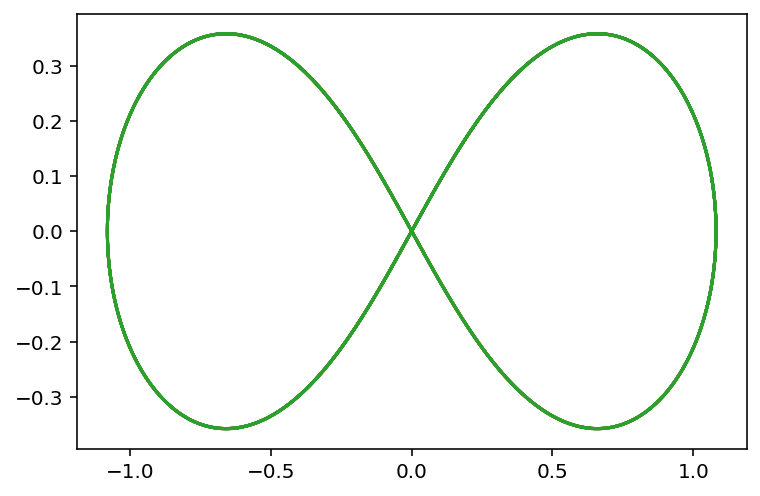

In [30]:
for i in range(N):
    plt.plot(x[i], y[i])

Чтобы посмотреть эволюцию системы во времени, используем методы для создания анимаций из библиотеки `matplotlib`:

In [32]:
import matplotlib.animation as animation

fig,ax = plt.subplots(1, 1, figsize = (8,6))

def animate(tlim):
    ax.clear()
    for i in range(N):
        ax.plot(x[i,: tlim + 1], y[i, :tlim + 1], color = 'tab:blue', zorder = 0)
        ax.scatter(x[i, tlim], y[i, tlim], color = 'tab:red', s = 80)
    ax.set_xlim(1.25 * np.min(x), 1.25 * np.max(x))
    ax.set_ylim(1.25 * np.min(y), 1.25 * np.max(y))
    
myAnimation = animation.FuncAnimation(fig, animate, frames= t.size - 1)
plt.close()
myAnimation.save('3body.gif', fps=2000, writer = 'pillow')

#### Изменим массу одного из тел

Уменьшим массу одного из тел всего на $3\%$ и посмотрим, как изменятся траектории тел:

In [33]:
masses = [1, 0.97, 1]

In [34]:
res = odeint(MF, y0 = init, t = t, args = (masses, N))

In [35]:
x, vx, y, vy = [res.T[N * i: N * (i + 1), :] for i in range(4)]

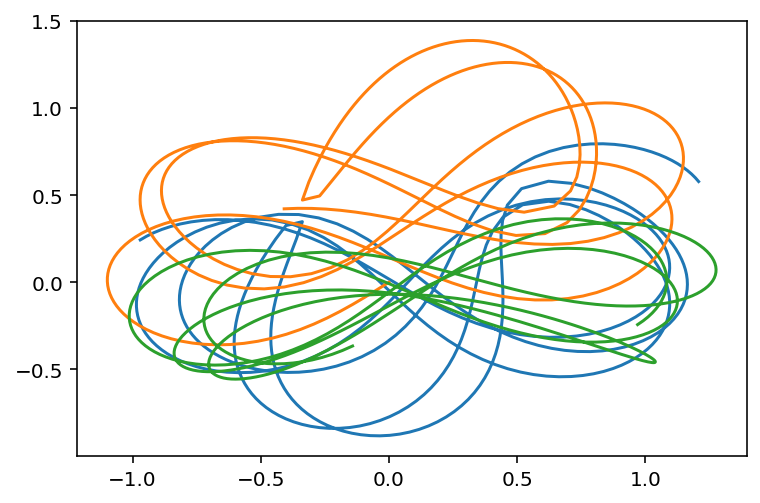

In [36]:
for i in range(N):
    plt.plot(x[i], y[i])

Движение тел довольно быстро отклоняется от восьмерки. Любое малое изменение начальных параметров будет приводить к сильным изменениям траекторий на больших временах:

In [37]:
fig,ax = plt.subplots(1, 1, figsize = (8,6))
  
myAnimation = animation.FuncAnimation(fig, animate, frames= t.size - 1)

plt.close()

myAnimation.save('3body+.gif', fps=2000, writer = 'pillow')